<a href="https://colab.research.google.com/github/waiyankyaw961999/ML_DL_learningpath/blob/master/Share_by_Me/Train_Test_Valid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, you will know how train,test and validation set is determined according to the pre-defined rules. I also added some references at the end of the notebook if you want understand more. 

Spiltting datasets is somewhat important because we don't tweak our hyperparameters on the training datasets. Instead, we adjust them on the splitted datasets to ensure the performance of our learning model. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Let's quickly go over the libraries:

*   Pandas- to load the data file as a Pandas data frame and analyze the data.
*   Sklearn - to load the datasets module and the linear_model to run a linear regression. From this library, I've imported train_test_splt to split the training and test sets
*  Matplotlib- to plot graphs 

In [ ]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [ ]:
# Load the Diabetes datasets
columns  = "age sex bmi map tc ldl hdl tch ltg glu".split() # Declare the columns name
diabetes = datasets.load_diabetes()                         # call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data,columns = columns)
y = diabetes.target
dlol=pd.DataFrame(diabetes.target)
df


,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [ ]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df,y,test_size = 0.2)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)


(353, 10) (353,)
(89, 10) (89,)
(353, 10) (353,)
(89, 10) (89,)


Now we'll fit the model on the training data:


In [ ]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

Let's plot the model:



Text(0, 0.5, 'Predictions')

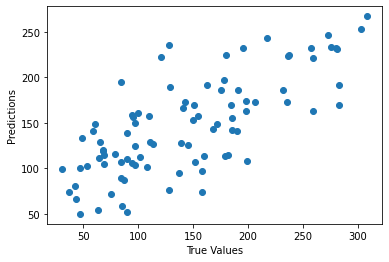

In [ ]:
plt.scatter(y_test,predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

Accuracy score:

In [ ]:
print("The accuracy for train sets",model.score(X_train,y_train))
print("The accuracy for test sets",model.score(X_test,y_test))

The accuracy for train sets 0.507147822954434
The accuracy for test sets 0.5375673297936376


## Cross Validation 

There are a bunch of cross validation methods, I'll go over two of them: the first is **K-Folds Cross Validation** and the second is **Leave One Out Cross Validation**(LOOCV)

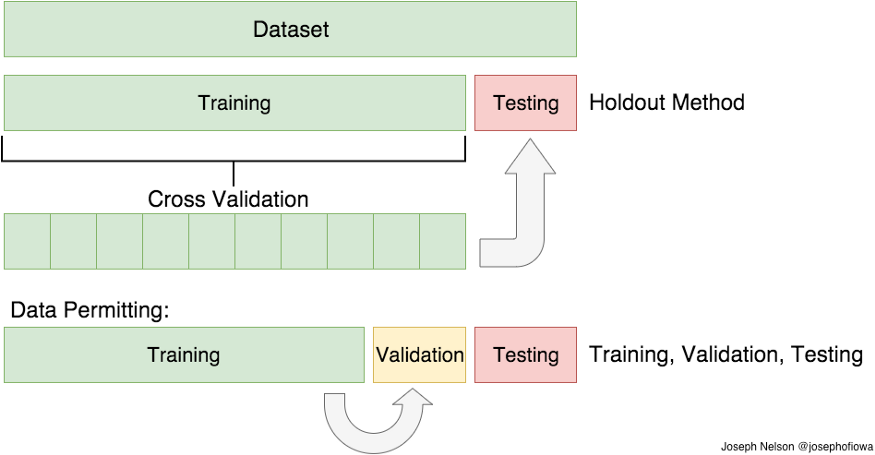

## K-Folds Cross Validation

In K-Folds Method, we split our data into k different subsets (or folds). We use k-1 subsets to train our data and leave the last subset as test data. We then average the model against each of the folds and then finalize our model. After that we test it against the test set.
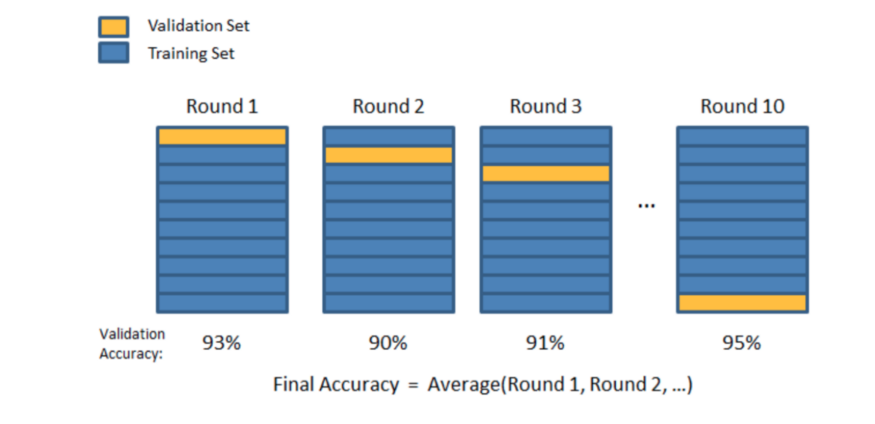

The sample example below is from [justmarkham/scikit-learn-videos](https://github.com/justmarkham/scikit-learn-videos) 

In [ ]:
# simulate splitting a dataset of 25 observations into 5 folds
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=False).split(range(25))
# print the contents of each training and testing set
print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{:^9} {} {:^25}'.format(iteration, data[0], str(data[1])))


Iteration                   Training set observations                   Testing set observations
    1     [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [0 1 2 3 4]       
    2     [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [5 6 7 8 9]       
    3     [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]     [10 11 12 13 14]     
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]     [15 16 17 18 19]     
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]     [20 21 22 23 24]     


## Leave One Out Cross Validation

In this type of cross validation, the number of folds(subsets) is equals to the number of observations we have in the dataset. We then average all of these folds and build our model with the average.Then, test the model against the last fold.  This method is very **computationally expensive** and should be used on **small datasets**. If the dataset is big, it would be better to use a different method, like KFolds.

In [ ]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut().split(range(25))
print('{} {:^75} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(loo, start=1):
    print('{:^9} {} {:^25}'.format(iteration, data[0], str(data[1])))


Iteration                          Training set observations                          Testing set observations
    1     [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]            [0]           
    2     [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]            [1]           
    3     [ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]            [2]           
    4     [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]            [3]           
    5     [ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]            [4]           
    6     [ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]            [5]           
    7     [ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]            [6]           
    8     [ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]            [7]           
    9    

In [ ]:
# Let's go back to our train the diabetes datasets using cross_validation_set
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [ ]:
# Perform 10-fold cross validation
scores = cross_val_score(model, df, y, cv=10)
print('Cross-validated scores:',scores)

Cross-validated scores: [0.55614411 0.23056092 0.35357777 0.62190498 0.26587602 0.61819338
 0.41815916 0.43515232 0.43436983 0.68568514]


51.03 %


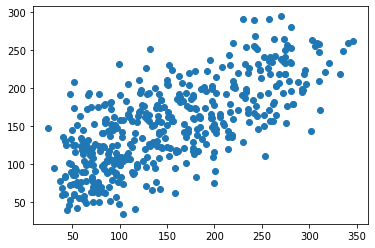

In [ ]:
# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=10)
plt.scatter(y, predictions)
print("{:.2f} %".format(model.score(df, y)*100))

References:
*  https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6
* https://github.com/justmarkham
* https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection

If you want to know other types of cross-validation, here is a link-https://en.wikipedia.org/wiki/Cross-validation_(statistics)